# Machine Learning Modelling

## Hotel Booking - Price Prediction

### Import Libraries

In [21]:
## General
import math
import pickle
import numpy as np
import pandas as pd

## EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)

## Machine Learning
# Pre-Processing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler      # Remove Mean and scale to Unit Variance
from sklearn.preprocessing import PowerTransformer    # Log Transformation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
import lightgbm as ltb
import xgboost as xgb
import catboost as cb

### Import Dataset

In [22]:
## Importing Data
data_hotel_bookings = pd.read_csv('../../Dataset/hotel_booking/hotel_bookings.csv')

## Understanding Data I
data_hotel_bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
## Understanding Data II
print(data_hotel_bookings.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [24]:
## Understanding Data III
data_hotel_bookings

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


### Pre-Processing

In [25]:
## Check Missing Data
data_hotel_bookings.isnull().sum()[data_hotel_bookings.isnull().sum() > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [26]:
## Fill Missing Data

# For Children
data_hotel_bookings.children.fillna(0, inplace = True)

# For Country
data_hotel_bookings.country.fillna("Unknown", inplace = True)

# For Agent
data_hotel_bookings.loc[data_hotel_bookings.agent.isnull() == False, 'agent'] = 'Agent'
data_hotel_bookings.agent.fillna("No Agent", inplace = True)

# For Company 
data_hotel_bookings.loc[data_hotel_bookings.company.isnull() == False, 'company'] = 'Corporate'
data_hotel_bookings.company.fillna("No Company", inplace = True)

# Re-Confirm 
data_hotel_bookings.isnull().sum()[data_hotel_bookings.isnull().sum() > 0]

Series([], dtype: int64)

In [27]:
## Changing Data Types
data_hotel_bookings['children'] = data_hotel_bookings['children'].astype('int') 

In [28]:
## Adjust to suit Streaming Data - Hotel Reservation
data_hotel_bookings.loc[(data_hotel_bookings['meal'] == 'Undefined'), 'meal']= 'SC'
data_hotel_bookings.loc[(data_hotel_bookings['required_car_parking_spaces'] > 1), 'required_car_parking_spaces']= 1

In [29]:
## Separating Data
data_hotel_bookings_resort = data_hotel_bookings.loc[data_hotel_bookings["hotel"] == "Resort Hotel"]
data_hotel_bookings_city = data_hotel_bookings.loc[data_hotel_bookings["hotel"] == "City Hotel"]

In [30]:
## Selecting Columns in both Hotel Booking & Hotel Reservation
data_hotel_bookings_city.drop(['hotel', 'arrival_date_week_number', 'babies', 'country', 'distribution_channel', 
                               'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'is_canceled', 
                               'days_in_waiting_list', 'customer_type', 'reservation_status', 'reservation_status_date',
                               'arrival_date_year', 'arrival_date_day_of_month'], 
                              axis = 1, inplace = True)

print(data_hotel_bookings_city.dtypes)

lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
meal                               object
market_segment                     object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object


C:\Users\KMwong\AppData\Local\Temp\ipykernel_17672\4011166877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.drop(['hotel', 'arrival_date_week_number', 'babies', 'country', 'distribution_channel',


### Feature Engineering

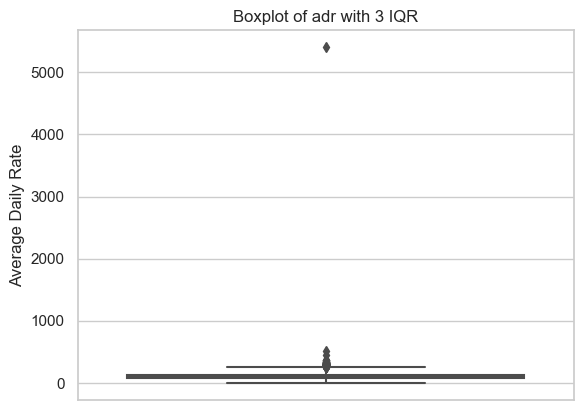

In [31]:
# Outlier Analysis for adr
adr_box = sns.boxplot(y = data_hotel_bookings_city["adr"], whis=3.0)
adr_box.set(ylabel = "Average Daily Rate",
                 title = "Boxplot of adr with 3 IQR")
plt.show()

C:\Users\KMwong\AppData\Local\Temp\ipykernel_17672\688556102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index
C:\Users\KMwong\AppData\Local\Temp\ipykernel_17672\688556102.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index


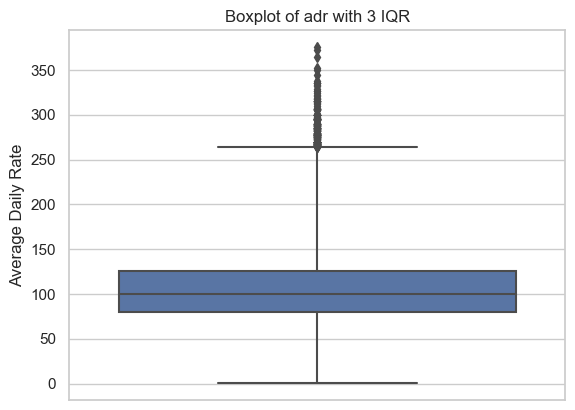

In [32]:
# Further Cleaning Data for adr
data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index 
                                           if 400 < data_hotel_bookings_city.loc[row, 'adr']], 
                                      inplace = True)
data_hotel_bookings_city.drop(index = [row for row in data_hotel_bookings_city.index 
                                            if 0 >= data_hotel_bookings_city.loc[row, 'adr']], 
                                      inplace = True)

# Visualising Box Again
adr_cleaned_box = sns.boxplot(y = data_hotel_bookings_city["adr"], whis=3.0)
adr_cleaned_box.set(ylabel = "Average Daily Rate",
                 title = "Boxplot of adr with 3 IQR")
plt.show()

In [33]:
# Rounding adr to nearest integer and convert to int
data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.round()
data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.astype('int')
# print(data_hotel_bookings_city.adr)

C:\Users\KMwong\AppData\Local\Temp\ipykernel_17672\3460971230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.round()
C:\Users\KMwong\AppData\Local\Temp\ipykernel_17672\3460971230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hotel_bookings_city.adr = data_hotel_bookings_city.adr.astype('int')


In [34]:
## Encoding

# OneHotEncoder (Run Once only)

# perform one-hot encoding for the market_segment column
market_segment_one_hot = pd.get_dummies(data_hotel_bookings_city['market_segment'], prefix='market_segment')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, market_segment_one_hot], axis=1)
# drop the original customer_type column
data_hotel_bookings_city.drop('market_segment', axis=1, inplace=True)

# perform one-hot encoding for the arrival_date_month column
arrival_date_month_one_hot = pd.get_dummies(data_hotel_bookings_city['arrival_date_month'], prefix='arrival_date_month')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, arrival_date_month_one_hot], axis=1)
# drop the original arrival_date_month column
data_hotel_bookings_city.drop('arrival_date_month', axis=1, inplace=True)

# perform one-hot encoding for the meal column
meal_one_hot = pd.get_dummies(data_hotel_bookings_city['meal'], prefix='meal')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, meal_one_hot], axis=1)
# drop the original meal column
data_hotel_bookings_city.drop('meal', axis=1, inplace=True)

# perform one-hot encoding for the reserved_room_type column
reserved_room_type_one_hot = pd.get_dummies(data_hotel_bookings_city['reserved_room_type'], prefix='reserved_room_type')
# concatenate the one-hot encoded columns to the original dataset
data_hotel_bookings_city = pd.concat([data_hotel_bookings_city, reserved_room_type_one_hot], axis=1)
# drop the original reserved_room_type column
data_hotel_bookings_city.drop('reserved_room_type', axis=1, inplace=True)


# LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# # apply LabelEncoder to the reservation_status column ('Canceled': -1, 'No-Show': 0, 'Check-Out': 1)
# mapping_rs = {'Canceled': -1, 'No-Show': 0, 'Check-Out': 1}
# data_hotel_bookings['reservation_status'] = data_hotel_bookings['reservation_status'].map(mapping_rs)
# data_hotel_bookings['reservation_status'] = le.fit_transform(data_hotel_bookings['reservation_status'])
# data_hotel_bookings['reservation_status'] = data_hotel_bookings['reservation_status'].map(dict(zip(range(3), mapping_rs.values())))

# # apply LabelEncoder to the deposit_type column ('Non-Refund': -1, 'No Deposit': 0, 'Refundable': 1)
# mapping_dt = {'Non Refund': -1, 'No Deposit': 0, 'Refundable': 1}
# data_hotel_bookings['deposit_type'] = data_hotel_bookings['deposit_type'].map(mapping_dt)
# data_hotel_bookings['deposit_type'] = le.fit_transform(data_hotel_bookings['deposit_type'])
# data_hotel_bookings['deposit_type'] = data_hotel_bookings['deposit_type'].map(dict(zip(range(3), mapping_dt.values())))

# print the result
data_hotel_bookings_city

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,...,meal_FB,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G
40061,88,0,4,2,0,0,0,0,76,0,...,0,0,0,1,0,0,0,0,0,0
40062,65,0,4,1,0,0,0,0,68,0,...,0,0,0,1,0,0,0,0,0,0
40063,92,2,4,2,0,0,0,0,76,0,...,0,0,0,1,0,0,0,0,0,0
40064,100,0,2,2,0,0,0,0,76,0,...,0,0,0,1,0,0,0,0,0,0
40065,79,0,3,2,0,0,0,0,76,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0,0,0,0,96,0,...,0,0,0,1,0,0,0,0,0,0
119386,102,2,5,3,0,0,0,0,225,0,...,0,0,0,0,0,0,0,1,0,0
119387,34,2,5,2,0,0,0,0,158,0,...,0,0,0,0,0,0,1,0,0,0
119388,109,2,5,2,0,0,0,0,104,0,...,0,0,0,1,0,0,0,0,0,0


In [137]:
## Only Run This For Classification Models (Not Regression Models)
# Create categories for the adr column (1: 0-50 dollars, 2: 51-100 dollars, ..., 350-400 dollars)
bins = [-1, 50, 100, 150, 200, 250, 300, 350, 400]
labels = [1, 2, 3, 4, 5, 6, 7, 8]
data_hotel_bookings_city['adr_category'] = pd.cut(data_hotel_bookings_city['adr'], bins=bins, labels=labels)

# print the result
data_hotel_bookings_city[['adr', 'adr_category']].max()

adr             376
adr_category      8
dtype: int64

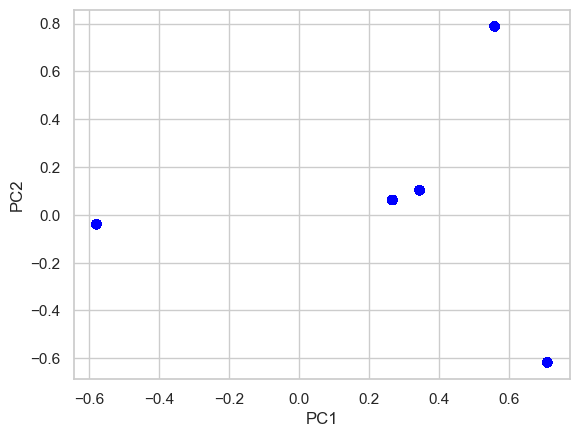

Explained variance ratios: [0.31870875 0.24779181 0.22103578 0.20000683 0.01245683]


In [15]:
## Principal Component Analysis (PCA)

# Select variables for PCA
X = data_hotel_bookings_city[['market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'market_segment_Undefined']]

# Add adr as target variable
y = data_hotel_bookings_city['adr']

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create scatter plot of first two principal components
colors = ['red' if x == 1 else 'blue' for x in y]
plt.scatter(X_pca[:,0], X_pca[:,1], c=colors)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


X = StandardScaler().fit_transform(X)

pca = PCA()
principalComponents = pca.fit_transform(X)

explained_var = pca.explained_variance_ratio_
print("Explained variance ratios:", explained_var)

In [35]:
## Correlation Matrix
data_hotel_bookings_city.corr()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,adr,required_car_parking_spaces,...,meal_FB,meal_HB,meal_SC,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G
lead_time,1.000000,-0.031570,0.050700,0.108199,-0.054733,-0.088560,0.128606,-0.058858,-0.192400,-0.077705,...,-0.003356,0.137314,-0.140243,0.143439,0.005881,-0.002162,-0.116372,-0.057200,-0.047908,-0.036585
stays_in_weekend_nights,-0.031570,1.000000,0.199644,0.082173,0.037901,-0.063767,-0.037242,-0.020677,0.025583,-0.024406,...,0.003573,-0.010542,0.001706,-0.087308,0.024486,-0.004673,0.074015,0.018705,0.018550,0.014768
stays_in_week_nights,0.050700,0.199644,1.000000,0.088193,0.037217,-0.068433,-0.050350,-0.035595,0.041741,-0.038079,...,-0.003815,-0.032968,-0.027871,-0.121812,0.023319,-0.000881,0.104144,0.035503,0.022302,0.022304
adults,0.108199,0.082173,0.088193,1.000000,-0.008921,-0.153498,-0.036332,-0.105451,0.266716,0.010488,...,-0.034988,0.033365,0.004790,-0.266829,-0.068435,-0.003135,0.267983,0.067851,0.045934,0.070255
children,-0.054733,0.037901,0.037217,-0.008921,1.000000,-0.027336,-0.043711,-0.016389,0.365179,0.056245,...,-0.005359,-0.003541,-0.078697,-0.279379,0.147874,0.002863,-0.059534,0.065104,0.629704,0.208585
is_repeated_guest,-0.088560,-0.063767,-0.068433,-0.153498,-0.027336,1.000000,0.275357,0.449856,-0.105263,0.103712,...,-0.003181,-0.041000,-0.040470,0.033280,-0.015786,0.005807,-0.026768,0.001002,-0.013130,-0.005997
previous_cancellations,0.128606,-0.037242,-0.050350,-0.036332,-0.043711,0.275357,1.000000,0.385596,-0.146733,-0.002825,...,-0.004168,0.010094,-0.064930,0.076817,-0.008021,0.002982,-0.064332,-0.018899,-0.025910,-0.014212
previous_bookings_not_canceled,-0.058858,-0.020677,-0.035595,-0.105451,-0.016389,0.449856,0.385596,1.000000,-0.062199,0.072178,...,-0.001541,-0.020222,-0.023034,0.017916,-0.007646,-0.000840,-0.018904,0.015711,-0.009786,-0.005040
adr,-0.192400,0.025583,0.041741,0.266716,0.365179,-0.105263,-0.146733,-0.062199,1.000000,0.074920,...,-0.009320,0.121625,-0.067326,-0.481209,-0.043605,0.000625,0.290422,0.205093,0.348965,0.241216
required_car_parking_spaces,-0.077705,-0.024406,-0.038079,0.010488,0.056245,0.103712,-0.002825,0.072178,0.074920,1.000000,...,-0.003419,-0.014052,-0.006344,-0.048805,0.013538,-0.001864,0.021668,0.038736,0.026256,0.018886


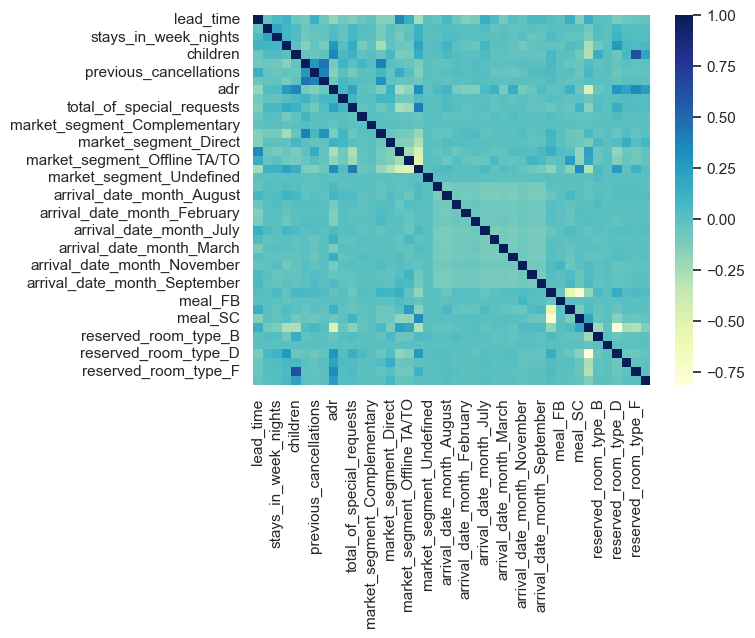

In [36]:
## Correlation Matrix Heatmap
sns.heatmap(data_hotel_bookings_city.corr(), cmap='YlGnBu') #, annot = True, annot_kws={"size":5})
plt.show()

In [37]:
## Feature Importance
corr_adr = data_hotel_bookings_city.corr()["adr"]
corr_adr.abs().sort_values(ascending = False)

adr                               1.000000
reserved_room_type_A              0.481209
children                          0.365179
reserved_room_type_F              0.348965
market_segment_Online TA          0.332869
reserved_room_type_D              0.290422
adults                            0.266716
market_segment_Groups             0.261283
reserved_room_type_G              0.241216
total_of_special_requests         0.214429
reserved_room_type_E              0.205093
lead_time                         0.192400
market_segment_Offline TA/TO      0.177976
arrival_date_month_May            0.149633
previous_cancellations            0.146733
arrival_date_month_February       0.139518
arrival_date_month_January        0.135284
meal_HB                           0.121625
market_segment_Corporate          0.121564
arrival_date_month_June           0.119723
market_segment_Direct             0.114021
arrival_date_month_March          0.109832
arrival_date_month_November       0.108779
is_repeated

In [38]:
## Selecting Features for Model Building
data_hotel_bookings_city_feature = data_hotel_bookings_city

data_hotel_bookings_city_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78119 entries, 40061 to 119389
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   lead_time                       78119 non-null  int64
 1   stays_in_weekend_nights         78119 non-null  int64
 2   stays_in_week_nights            78119 non-null  int64
 3   adults                          78119 non-null  int64
 4   children                        78119 non-null  int32
 5   is_repeated_guest               78119 non-null  int64
 6   previous_cancellations          78119 non-null  int64
 7   previous_bookings_not_canceled  78119 non-null  int64
 8   adr                             78119 non-null  int32
 9   required_car_parking_spaces     78119 non-null  int64
 10  total_of_special_requests       78119 non-null  int64
 11  market_segment_Aviation         78119 non-null  uint8
 12  market_segment_Complementary    78119 non-null  uint8
 

### Model Selection

In [39]:
## Splitting Data (80:20) Regression
x = data_hotel_bookings_city_feature.drop(columns = 'adr')
y = data_hotel_bookings_city_feature.adr 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((62495, 41), (15624, 41))

In [143]:
## Splitting Data (80:20) Classification
x = data_hotel_bookings_city_feature.drop(columns = ['adr', 'adr_category'])
y = data_hotel_bookings_city_feature.adr_category

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((62495, 43), (15624, 43))

#### Regression Models

In [41]:
## Model : Linear Regression
# Finding linear relationship among more than two quantitative variables

lnr = LinearRegression()
lnr_model = lnr.fit(x_train, y_train)
lnr_y_pred = lnr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, lnr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, lnr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lnr_y_pred)}")

# # Plot Output
# plt.scatter(x_test, y_test, color="black")
# plt.plot(x_test, lnr_y_pred, color="blue", linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.show()

Mean Squared Error: 577.5141981894908
RMSE: 24.03152509079461
R2 Score: 0.5850786569686197


In [40]:
## Model : Random Forest Regressor
# Meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to 
# improve the predictive accuracy and control over-fitting

rfr = RandomForestRegressor()
rfr_model = rfr.fit(x_train, y_train)
rfr_y_pred = rfr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, rfr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, rfr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, rfr_y_pred)}")

Mean Squared Error: 285.13748075912247
RMSE: 16.886014353870557
R2 Score: 0.795139882558627


In [42]:
## Model : Gradient Boosting Regressor
# Builds an additive model in a forward stage-wise fashion for the optimization of arbitrary differentiable loss functions. 
# In each stage a regression tree is fit on the negative gradient of the given loss function.

gbr = GradientBoostingRegressor()
gbr_model = gbr.fit(x_train, y_train)
gbr_y_pred = gbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, gbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, gbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, gbr_y_pred)}")

Mean Squared Error: 507.56734714888904
RMSE: 22.529255361615682
R2 Score: 0.6353327311811116


In [111]:
## Model : Stochastic Gradient Descent Regressor
# Gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength 
# schedule (aka learning rate).

sgdr = SGDRegressor()
sgdr_model = sgdr.fit(x_train, y_train)
sgdr_y_pred = sgdr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, sgdr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, sgdr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, sgdr_y_pred)}")

Mean Squared Error: 1.3295288863885041e+29
RMSE: 364627054178444.6
R2 Score: -9.552144568371791e+25


In [43]:
## Model : Elastic Net
# Linear regression with combined L1 and L2 priors as regularizer

en = ElasticNet()
en_model = en.fit(x_train, y_train)
en_y_pred = en_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, en_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, en_y_pred))}")
print(f"R2 Score: {r2_score(y_test, en_y_pred)}")

Mean Squared Error: 1031.4890107227852
RMSE: 32.11680262296957
R2 Score: 0.2589155262451588


In [44]:
## Model : Bayesian Ridge
# Allows a natural mechanism to survive insufficient data or poorly distributed data by formulating linear regression using 
# probability distributors rather than point estimates. 
# The output or response 'y' is assumed to drawn from a probability distribution rather than estimated as a single value.

br = BayesianRidge()
br_model = br.fit(x_train, y_train)
br_y_pred = br_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, br_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, br_y_pred))}")
print(f"R2 Score: {r2_score(y_test, br_y_pred)}")

Mean Squared Error: 577.4546001148489
RMSE: 24.03028506104014
R2 Score: 0.5851214758521208


In [45]:
## Model : LGBM Regressor
# LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
# It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose the leaf with max delta 
# loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more loss than a level-wise algorithm.

lgbmr = ltb.LGBMRegressor()
lgbmr_model = lgbmr.fit(x_train, y_train)
lgbmr_y_pred = lgbmr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, lgbmr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, lgbmr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, lgbmr_y_pred)}")

Mean Squared Error: 377.25018230701363
RMSE: 19.422929292643108
R2 Score: 0.7289605124992968


In [46]:
## Model : XGBoost Regressor
# Efficient implementation of gradient boosting that can be used for regression predictive modeling

xgbr = xgb.XGBRegressor()
xgbr_model = xgbr.fit(x_train, y_train)
xgbr_y_pred = xgbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, xgbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, xgbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, xgbr_y_pred)}")

Mean Squared Error: 327.8691137100519
RMSE: 18.107156422532277
R2 Score: 0.7644388771296556


In [47]:
## Model : CatBoost Regressor
# builds upon the theory of decision trees and gradient boosting. 
# The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) 
# and thus through greedy search create a strong competitive predictive model

cbr = cb.CatBoostRegressor()
cbr_model = cbr.fit(x_train, y_train)
cbr_y_pred = cbr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, cbr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, cbr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, cbr_y_pred)}")

Learning rate set to 0.078691
0:	learn: 36.1624901	total: 156ms	remaining: 2m 35s
1:	learn: 35.1257299	total: 161ms	remaining: 1m 20s
2:	learn: 34.1668528	total: 167ms	remaining: 55.4s
3:	learn: 33.3124072	total: 172ms	remaining: 42.8s
4:	learn: 32.5703188	total: 177ms	remaining: 35.2s
5:	learn: 31.9327134	total: 182ms	remaining: 30.1s
6:	learn: 31.3009789	total: 187ms	remaining: 26.5s
7:	learn: 30.7929241	total: 193ms	remaining: 24s
8:	learn: 30.2722608	total: 200ms	remaining: 22s
9:	learn: 29.8264439	total: 208ms	remaining: 20.6s
10:	learn: 29.3716291	total: 214ms	remaining: 19.2s
11:	learn: 28.9822694	total: 218ms	remaining: 18s
12:	learn: 28.6331251	total: 223ms	remaining: 17s
13:	learn: 28.3020380	total: 228ms	remaining: 16.1s
14:	learn: 28.0128871	total: 234ms	remaining: 15.3s
15:	learn: 27.7492662	total: 238ms	remaining: 14.7s
16:	learn: 27.4815808	total: 244ms	remaining: 14.1s
17:	learn: 27.2378015	total: 249ms	remaining: 13.6s
18:	learn: 27.0252978	total: 253ms	remaining: 13.1

172:	learn: 20.5842105	total: 993ms	remaining: 4.75s
173:	learn: 20.5734872	total: 999ms	remaining: 4.74s
174:	learn: 20.5628279	total: 1s	remaining: 4.73s
175:	learn: 20.5416876	total: 1.01s	remaining: 4.73s
176:	learn: 20.5375111	total: 1.02s	remaining: 4.73s
177:	learn: 20.5237190	total: 1.02s	remaining: 4.72s
178:	learn: 20.5180821	total: 1.03s	remaining: 4.71s
179:	learn: 20.5090500	total: 1.03s	remaining: 4.69s
180:	learn: 20.4992149	total: 1.03s	remaining: 4.68s
181:	learn: 20.4795693	total: 1.04s	remaining: 4.68s
182:	learn: 20.4703105	total: 1.04s	remaining: 4.67s
183:	learn: 20.4600135	total: 1.05s	remaining: 4.66s
184:	learn: 20.4548960	total: 1.05s	remaining: 4.65s
185:	learn: 20.4435763	total: 1.06s	remaining: 4.64s
186:	learn: 20.4301563	total: 1.07s	remaining: 4.64s
187:	learn: 20.4212227	total: 1.07s	remaining: 4.63s
188:	learn: 20.4110399	total: 1.07s	remaining: 4.62s
189:	learn: 20.4008553	total: 1.08s	remaining: 4.61s
190:	learn: 20.3852670	total: 1.08s	remaining: 4.

335:	learn: 19.4105462	total: 1.79s	remaining: 3.55s
336:	learn: 19.4069470	total: 1.8s	remaining: 3.54s
337:	learn: 19.4047641	total: 1.8s	remaining: 3.53s
338:	learn: 19.3992504	total: 1.81s	remaining: 3.53s
339:	learn: 19.3947077	total: 1.81s	remaining: 3.52s
340:	learn: 19.3909614	total: 1.82s	remaining: 3.52s
341:	learn: 19.3834370	total: 1.83s	remaining: 3.52s
342:	learn: 19.3780347	total: 1.83s	remaining: 3.51s
343:	learn: 19.3673621	total: 1.84s	remaining: 3.5s
344:	learn: 19.3670488	total: 1.84s	remaining: 3.5s
345:	learn: 19.3667545	total: 1.85s	remaining: 3.49s
346:	learn: 19.3647018	total: 1.85s	remaining: 3.49s
347:	learn: 19.3601873	total: 1.86s	remaining: 3.48s
348:	learn: 19.3601248	total: 1.86s	remaining: 3.47s
349:	learn: 19.3554458	total: 1.87s	remaining: 3.47s
350:	learn: 19.3548559	total: 1.87s	remaining: 3.46s
351:	learn: 19.3456882	total: 1.88s	remaining: 3.46s
352:	learn: 19.3372787	total: 1.88s	remaining: 3.45s
353:	learn: 19.3350631	total: 1.89s	remaining: 3.4

501:	learn: 18.7209798	total: 2.62s	remaining: 2.6s
502:	learn: 18.7186080	total: 2.63s	remaining: 2.6s
503:	learn: 18.7157208	total: 2.63s	remaining: 2.59s
504:	learn: 18.7107908	total: 2.64s	remaining: 2.59s
505:	learn: 18.7054510	total: 2.64s	remaining: 2.58s
506:	learn: 18.7006629	total: 2.65s	remaining: 2.58s
507:	learn: 18.6902338	total: 2.66s	remaining: 2.57s
508:	learn: 18.6861025	total: 2.66s	remaining: 2.57s
509:	learn: 18.6821376	total: 2.67s	remaining: 2.57s
510:	learn: 18.6731412	total: 2.67s	remaining: 2.56s
511:	learn: 18.6719094	total: 2.68s	remaining: 2.55s
512:	learn: 18.6683977	total: 2.69s	remaining: 2.55s
513:	learn: 18.6661804	total: 2.69s	remaining: 2.54s
514:	learn: 18.6622869	total: 2.69s	remaining: 2.54s
515:	learn: 18.6591648	total: 2.7s	remaining: 2.53s
516:	learn: 18.6552161	total: 2.71s	remaining: 2.53s
517:	learn: 18.6551801	total: 2.71s	remaining: 2.52s
518:	learn: 18.6473731	total: 2.71s	remaining: 2.52s
519:	learn: 18.6420771	total: 2.72s	remaining: 2.

659:	learn: 18.2210762	total: 3.65s	remaining: 1.88s
660:	learn: 18.2161239	total: 3.66s	remaining: 1.88s
661:	learn: 18.2141541	total: 3.67s	remaining: 1.87s
662:	learn: 18.2101634	total: 3.68s	remaining: 1.87s
663:	learn: 18.2080906	total: 3.69s	remaining: 1.87s
664:	learn: 18.2061213	total: 3.7s	remaining: 1.86s
665:	learn: 18.2039607	total: 3.71s	remaining: 1.86s
666:	learn: 18.2007222	total: 3.72s	remaining: 1.86s
667:	learn: 18.1975442	total: 3.73s	remaining: 1.85s
668:	learn: 18.1938015	total: 3.74s	remaining: 1.85s
669:	learn: 18.1932075	total: 3.74s	remaining: 1.84s
670:	learn: 18.1897306	total: 3.75s	remaining: 1.84s
671:	learn: 18.1864394	total: 3.76s	remaining: 1.83s
672:	learn: 18.1838872	total: 3.77s	remaining: 1.83s
673:	learn: 18.1814022	total: 3.77s	remaining: 1.82s
674:	learn: 18.1793169	total: 3.78s	remaining: 1.82s
675:	learn: 18.1768778	total: 3.79s	remaining: 1.82s
676:	learn: 18.1760442	total: 3.81s	remaining: 1.81s
677:	learn: 18.1730306	total: 3.82s	remaining: 

820:	learn: 17.8282901	total: 5.76s	remaining: 1.25s
821:	learn: 17.8242888	total: 5.77s	remaining: 1.25s
822:	learn: 17.8234729	total: 5.79s	remaining: 1.25s
823:	learn: 17.8185777	total: 5.81s	remaining: 1.24s
824:	learn: 17.8170154	total: 5.82s	remaining: 1.24s
825:	learn: 17.8152143	total: 5.84s	remaining: 1.23s
826:	learn: 17.8124448	total: 5.85s	remaining: 1.22s
827:	learn: 17.8102387	total: 5.86s	remaining: 1.22s
828:	learn: 17.8070952	total: 5.88s	remaining: 1.21s
829:	learn: 17.8061394	total: 5.89s	remaining: 1.21s
830:	learn: 17.8045203	total: 5.9s	remaining: 1.2s
831:	learn: 17.8030670	total: 5.91s	remaining: 1.19s
832:	learn: 17.8002201	total: 5.93s	remaining: 1.19s
833:	learn: 17.7964112	total: 5.94s	remaining: 1.18s
834:	learn: 17.7940624	total: 5.95s	remaining: 1.18s
835:	learn: 17.7915936	total: 5.96s	remaining: 1.17s
836:	learn: 17.7900593	total: 5.98s	remaining: 1.16s
837:	learn: 17.7850806	total: 6s	remaining: 1.16s
838:	learn: 17.7835602	total: 6.01s	remaining: 1.15

988:	learn: 17.4943276	total: 7.85s	remaining: 87.3ms
989:	learn: 17.4898069	total: 7.87s	remaining: 79.5ms
990:	learn: 17.4898006	total: 7.89s	remaining: 71.7ms
991:	learn: 17.4882627	total: 7.91s	remaining: 63.8ms
992:	learn: 17.4882430	total: 7.93s	remaining: 55.9ms
993:	learn: 17.4854384	total: 7.95s	remaining: 48ms
994:	learn: 17.4844347	total: 7.97s	remaining: 40.1ms
995:	learn: 17.4834313	total: 7.99s	remaining: 32.1ms
996:	learn: 17.4823607	total: 8.01s	remaining: 24.1ms
997:	learn: 17.4814005	total: 8.02s	remaining: 16.1ms
998:	learn: 17.4794690	total: 8.02s	remaining: 8.03ms
999:	learn: 17.4757830	total: 8.03s	remaining: 0us
Mean Squared Error: 333.82175810487934
RMSE: 18.270789750442628
R2 Score: 0.7601621351644656


In [117]:
## Model : Support Vector Machine Regressor
# Used to predict discrete values
# Best fit line is the hyperplane that has the maximum number of points

svr = SVR()
svr_model = svr.fit(x_train, y_train)
svr_y_pred = svr_model.predict(x_test)

# Print Coefficients
print(f"Mean Squared Error: {mean_squared_error(y_test, svr_y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test, svr_y_pred))}")
print(f"R2 Score: {r2_score(y_test, svr_y_pred)}")

Mean Squared Error: 1375.8741409011318
RMSE: 37.09277747623022
R2 Score: 0.011488292106837106


Model Comparison

Ranking Models By R^2 (Coefficient of Determination)
1. 0.79514 Random Forest Regressor
2. 0.76444 XGBoost Regressor
3. 0.76016 CatBoost Regressor
4. 0.72896 LightGBM Regressor
5. 0.63533 Gradient Boosting Regressor
6. 0.58512 Bayesian Ridge
7. 0.58509 Linear Regression
8. 0.25892 Elastic Net
9. 0.01149 Support Vector Regressor
10. -9.5e+25 Stochastic Gradient Descent Regressor

#### Classification Models

In [144]:
## Model : Logistic Regression
# Linear relationship between the log-odds of binary variable and multiple quantitative variables

lgr = LogisticRegression()
lgr_model = lgr.fit(x_train, y_train)
lgr_y_pred = lgr_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, lgr_y_pred)}")
# Proportion of Actual Yes out of Predicted Yes: (TP) / (TP + FP)
# print(f"Precision: {precision_score(y_test, lgr_y_pred)}")
# Proportion of Predicted Yes out of Actual Yes: (TP) / (TP + FN)
# print(f"Sensitivity/Recall: {recall_score(y_test, lgr_y_pred)}")
# Balanced Index Between Precision & Sensitivity: (2 * Precision * Sensitivity) / (Precision + Sensitivity)
# print(f"F1 Score: {f1_score(y_test, lgr_y_pred)}")

# print(f"Classification report: \n {classification_report(y_test, lgr_y_pred)}")
# ConfusionMatrixDisplay(confusion_matrix(y_test, lgr_y_pred)).plot()
# plt.title('Confusion Matrix For Given Prediction')
# plt.show()

Accuracy: 0.5108806963645673


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
## Model : Naive Bayes (using GNB Technique)
# Assumes each parameter (Feature) has an independent capacity of predicting output variable

gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
gnb_y_pred = gnb_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, gnb_y_pred)}")

Accuracy: 0.3854326676907322


In [146]:
## Model : Naive Bayes (using MNB Technique)
# Probabilistic learning method that is mostly used in Natural Language Processing (NLP). 
# The algorithm is based on the Bayes theorem and predicts the tag of a text such as a piece of email or newspaper article.

mnb = MultinomialNB()
mnb_model = mnb.fit(x_train, y_train)
mnb_y_pred = mnb_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, mnb_y_pred)}")

Accuracy: 0.27067332309267794


In [147]:
## Model : K-Nearest Neighbours
# Learning based on the nearest neighbors of each query point, where k is an integer value specified by the user

knn = KNeighborsClassifier()
knn_model = knn.fit(x_train, y_train)
knn_y_pred = knn_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, knn_y_pred)}")

C:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.7246543778801844


In [148]:
## Model : Random Forest Classifier
# meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging 
# to improve the predictive accuracy and control over-fitting.
# Combines output of multiple decision trees to reach a single result

rf = RandomForestClassifier()
rf_model = rf.fit(x_train, y_train)
rf_y_pred = rf_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred)}")

Accuracy: 0.8844726062467998


In [149]:
## Model : Decision Tree Classifier 
# Non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks.
# Create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
# A tree can be seen as a piecewise constant approximation.

dt = DecisionTreeClassifier()
dt_model = dt.fit(x_train, y_train)
dt_y_pred = dt_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, dt_y_pred)}")

Accuracy: 0.8562467997951869


In [150]:
## Model : Extra Trees 
# Meta estimator that fits a number of randomized decision trees and uses averaging to improve the predictive accuracy 
# and control over-fitting.

et = ExtraTreesClassifier()
et_model = et.fit(x_train, y_train)
et_y_pred = et_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, et_y_pred)}")

Accuracy: 0.8778161802355351


In [151]:
## Model : Ada Boost
# Meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier 
# on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers 
# focus more on difficult cases.

ada = AdaBoostClassifier(base_estimator = dt)
ada_model = ada.fit(x_train, y_train)
ada_y_pred = ada_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, ada_y_pred)}")

Accuracy: 0.8792242703533026


In [152]:
## Model : LightGBM Classifier
# LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally. 
# It means that LightGBM grows tree leaf-wise while other algorithms grow level-wise. It will choose the leaf with max delta 
# loss to grow. When growing the same leaf, leaf-wise algorithm can reduce more loss than a level-wise algorithm.

lgbmc = ltb.LGBMClassifier()
lgbmc_model = lgbmc.fit(x_train, y_train)
lgbmc_y_pred = lgbmc_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, lgbmc_y_pred)}")

Accuracy: 0.8374295954941117


In [153]:
## Model : Stochastic Gradient Descent Classifier
# Optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best 
# fit between predicted and actual outputs.
# Plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification

sgd = SGDClassifier()
sgd_model = sgd.fit(x_train, y_train)
sgd_y_pred = sgd_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, sgd_y_pred)}")

Accuracy: 0.5725166410650282


In [156]:
## Model : Gradient Boosting
# Functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or 
# negative gradient so that it can minimize a loss function.

gb = GradientBoostingClassifier()
gb_model = gb.fit(x_train, y_train)
gb_y_pred = gb_model.predict(x_test)

# Proportion of Correction Classification: (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy: {accuracy_score(y_test, gb_y_pred)}")

Accuracy: 0.7592165898617511


Model Comparison

Ranking Models By Accuracy
1. 0.88447 Random Forest Classifier
2. 0.87922 Ada Boost
3. 0.87782 Extra Trees Classifier
4. 0.85623 Decision Tree Classifier
5. 0.83743 LGBM Classifier
6. 0.75922 Gradient Boosting Classifier
7. 0.72465 KNN Classifier
8. 0.57252 Stochastic Gradient Descent Classifier 
9. 0.51088 Logistic Regression
10. 0.38543 Gaussian Naive-Bayes
11. 0.27067 Multinomial Naive-Bayes

In [22]:
# Dump Model Into Pickle
pickle.dump(rfr_model, open('price_model.pkl', 'wb'))